# Two Gaussians Test

Test of Hamiltonian Nested Sampling on a mixture of two Gaussians

In [1]:
# Imports
import numpy as np
import torch
from gradNS import Param, HamiltonianNS
from getdist import plots, MCSamples

/Users/pablo/miniconda3/envs/gns/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Number of dimensions of the problem
ndims = 5

# Define the two components
mvn1 = torch.distributions.MultivariateNormal(loc=-1*torch.ones(ndims),
                                             covariance_matrix=torch.diag(
                                                 0.2*torch.ones(ndims)))

mvn2 = torch.distributions.MultivariateNormal(loc=2*torch.ones(ndims),
                                             covariance_matrix=torch.diag(
                                                 0.2*torch.ones(ndims)))

# Define the likelihood
def get_loglike(theta):
    return torch.logsumexp(torch.stack([mvn1.log_prob(theta), mvn2.log_prob(theta)]), dim=0, keepdim=False) - torch.log(torch.tensor(2.0))

In [3]:
# Define the parameters for GradNS
params = []

for i in range(ndims):
    params.append(
        Param(
            name=f'p{i}',
            prior_type='Uniform',
            prior=(-5, 5),
            label=f'p_{i}')
    )

# Create a Nested Sampling object
ns = HamiltonianNS(
    nlive=200,
    loglike=get_loglike,
    params=params,
    verbose=True,
    clustering=True,
    tol=1e-2
)

In [4]:
# Run the sampler
ns.run()

Increasing dt to  0.15000000000000002 out_frac =  tensor(0.0334) active =  100
Increasing dt to  0.22500000000000003 out_frac =  tensor(0.0488) active =  100
---------------------------------------------
logZ = -24.0097, eps = 6.9022e+02, 1.0000
---------------------------------------------
Cluster 0 has volume fraction 0.4850 and logZp = -24.7142
Cluster 1 has volume fraction 0.5150 and logZp = -24.6542
---------------------------------------------
logZ = -20.2602, eps = 3.0648e+02, 1.0000
---------------------------------------------
Cluster 0 has volume fraction 0.4600 and logZp = -21.2997
Cluster 1 has volume fraction 0.5400 and logZp = -20.6664
---------------------------------------------
logZ = -17.9741, eps = 1.2595e+02, 1.0000
---------------------------------------------
Cluster 0 has volume fraction 0.5150 and logZp = -18.7610
Cluster 1 has volume fraction 0.4850 and logZp = -18.5505
---------------------------------------------
logZ = -15.9729, eps = 5.0254e+01, 1.0000
----

In [5]:
# The true logZ is the inverse of the prior volume
print('True logZ = ', np.log(1 / 10**len(params)))
print('Number of evaluations', ns.get_like_evals())

True logZ =  -11.512925464970229
Number of evaluations 135145


### Plot

Generate a plot of the true and sampled posteriors, using GetDist

Removed no burn in
Removed no burn in


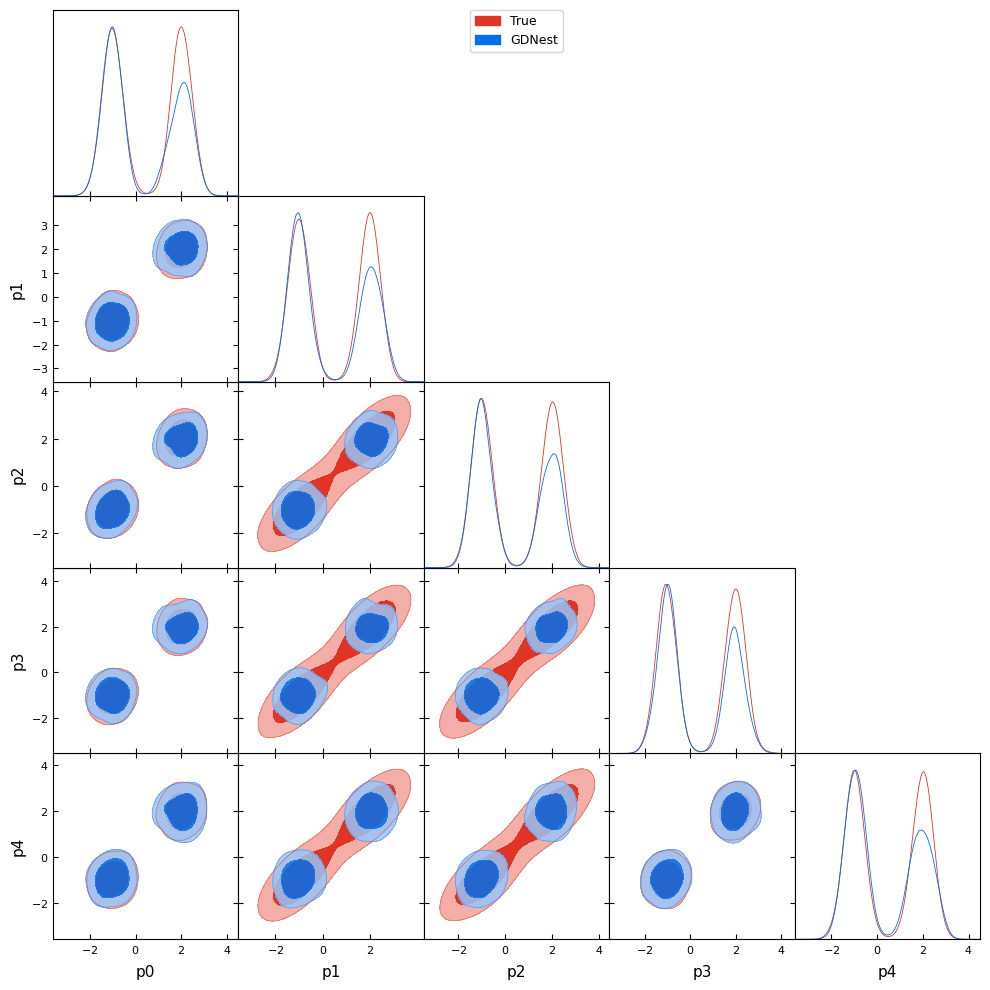

In [6]:
samples = ns.convert_to_getdist()
true_samples = torch.cat([mvn1.sample((1000,)), mvn2.sample((1000,))], dim=0)
true_samples = MCSamples(samples=true_samples.numpy(), names=[f'p{i}' for i in range(ndims)])
g = plots.get_subplot_plotter()
g.triangle_plot([true_samples, samples], [f'p{i}' for i in range(5)], filled=True, legend_labels=['True', 'GDNest'])